In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style = 'whitegrid')
current_palette = sns.color_palette("Paired")
sns.set_palette(current_palette)
import plotly.express as px

import matplotlib.pyplot as plt

from tqdm import tqdm
import sys
import warnings
warnings.filterwarnings("ignore")

In [20]:
vehicle_df = pd.read_csv('/Users/priti16/Downloads/assignment_5_1_starter/data/coupons.csv')

In [21]:
vehicle_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [22]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [23]:
vehicle_df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [24]:
vehicle_df['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [25]:
#Data cleaning - After finding null values, I found out that Column 'car' has 99% of the missing value, hence I want to drop this column because even after predicting missing values, this column has less importance, and it has less predictive power.

In [26]:
vehicle_df.drop(columns=['car'], inplace=True)

In [27]:

values = {'col':[],'unique':[]}

for col in vehicle_df.columns:
    values['col'].append(col)
    values['unique'].append(vehicle_df[col].unique())

values = pd.DataFrame(values)

values

,col,unique
0,destination,"[No Urgent Place, Home, Work]"
1,passanger,"[Alone, Friend(s), Kid(s), Partner]"
2,weather,"[Sunny, Rainy, Snowy]"
3,temperature,"[55, 80, 30]"
4,time,"[2PM, 10AM, 6PM, 7AM, 10PM]"
5,coupon,"[Restaurant(<20), Coffee House, Carry out & Ta..."
6,expiration,"[1d, 2h]"
7,gender,"[Female, Male]"
8,age,"[21, 46, 26, 31, 41, 50plus, 36, below21]"
9,maritalStatus,"[Unmarried partner, Single, Married partner, D..."


In [28]:
vehicle_df.drop(columns=['toCoupon_GEQ5min'], inplace=True)
     

In [29]:
vehicle_df.rename(columns={'passanger': 'passenger', 'maritalStatus': 'marital_status', 'CarryAway': 'CarryOut', 'Y': 'target'}, inplace = True)
     

Text(0.5, 1.0, 'Target Class')

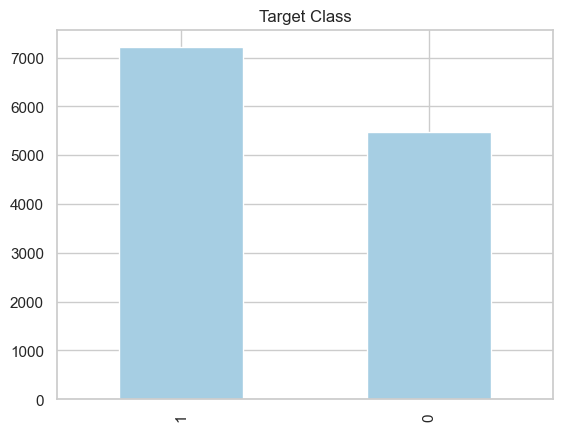

In [30]:
vehicle_df.target.value_counts().plot(kind='bar')
plt.title('Target Class')

In [31]:
# Drop column, redundant
vehicle_df.drop(columns=['direction_opp'], inplace=True)

In [37]:
print("After data cleaning")
print("Number of data points:", vehicle_df.shape[0])
print("Number of features:", vehicle_df.shape[1])
print('-'*100)
print("The attributes of data :\n", vehicle_df.columns.values)

After data cleaning
Number of data points: 12684
Number of features: 23
----------------------------------------------------------------------------------------------------
The attributes of data :
 ['destination' 'passenger' 'weather' 'temperature' 'time' 'coupon'
 'expiration' 'gender' 'age' 'marital_status' 'has_children' 'education'
 'occupation' 'income' 'Bar' 'CoffeeHouse' 'CarryOut'
 'RestaurantLessThan20' 'Restaurant20To50' 'toCoupon_GEQ15min'
 'toCoupon_GEQ25min' 'direction_same' 'target']


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

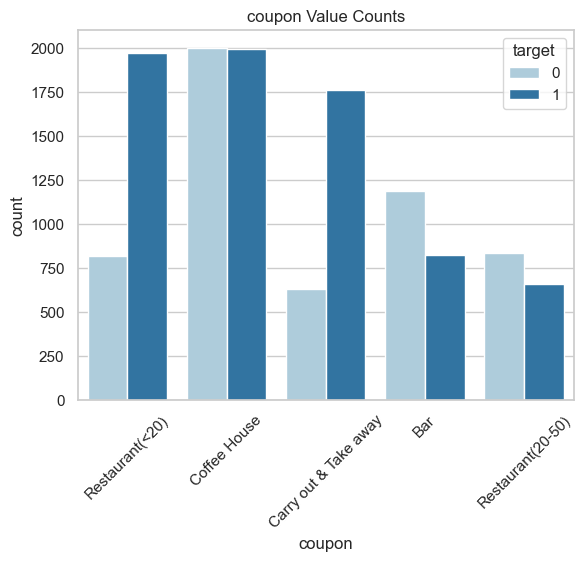

In [45]:
#visualize the `coupon` column
sns.countplot(x='coupon',data=vehicle_df,hue='target')
plt.title("coupon Value Counts")
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Bar Value Counts')

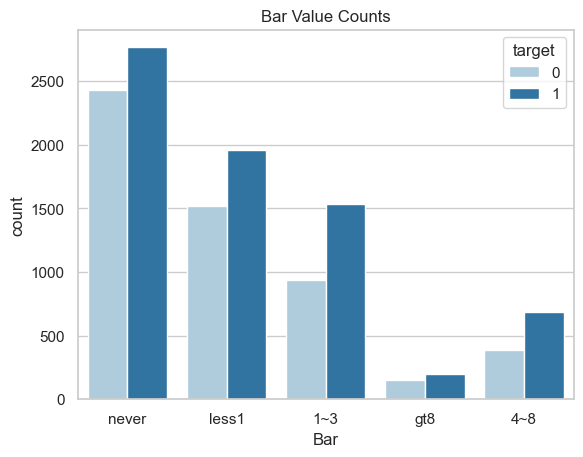

In [46]:
#visualize the `Bar` column

sns.countplot(x='Bar',data=vehicle_df,hue='target')
plt.title("Bar Value Counts")

Text(0.5, 1.0, 'CoffeeHouse Value Counts')

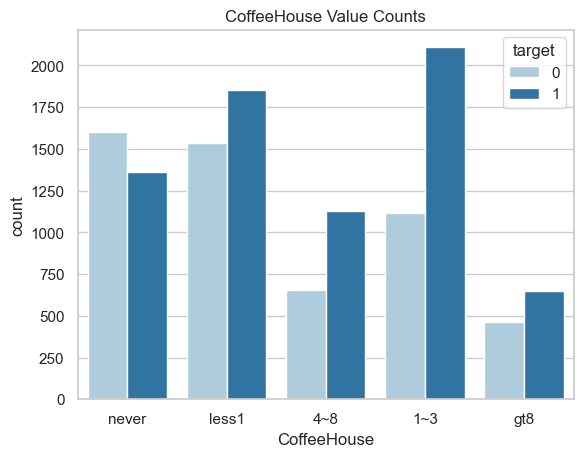

In [47]:
#visualize the `CoffeeHouse` column

sns.countplot(x='CoffeeHouse',data=vehicle_df,hue='target')
plt.title("CoffeeHouse Value Counts")

Text(0.5, 1.0, 'CarryOut Value Counts')

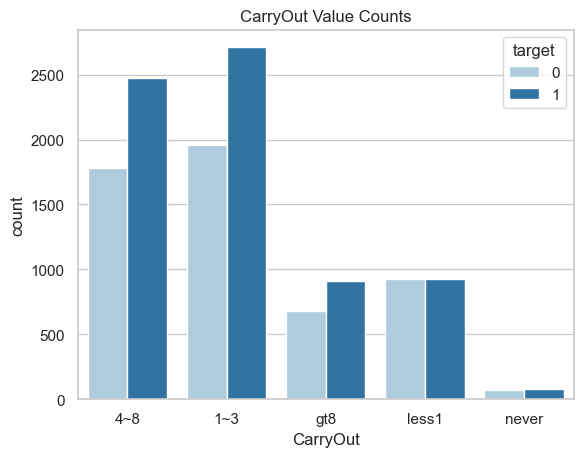

In [48]:
##visualize the `CarryOut` column


sns.countplot(x='CarryOut',data=vehicle_df,hue='target')
plt.title("CarryOut Value Counts")

In [49]:
vehicle_df['education'].unique()

array(['Some college - no degree', 'Bachelors degree',
       'Associates degree', 'High School Graduate',
       'Graduate degree (Masters or Doctorate)', 'Some High School'],
      dtype=object)

Text(0.5, 1.0, 'Occupation Values Count')

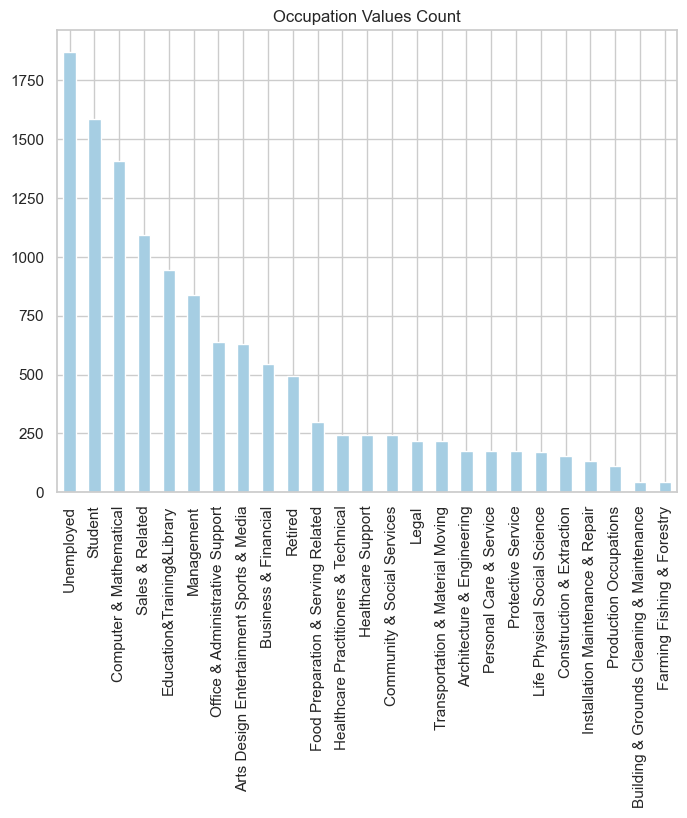

In [50]:
#Acceptance rate between driver who go to bars more than once a month and had passengers that had occupations other than farming, fishing, or forestry. 


plt.figure(figsize=(8,6))

vehicle_df.occupation.value_counts().plot(kind='bar')
plt.title('Occupation Values Count')
     

In [51]:
target_yes = vehicle_df[vehicle_df['target']==1] 
target_no = vehicle_df[vehicle_df['target']==0] 

Text(0.5, 1.0, 'Coupon used by Occupation')

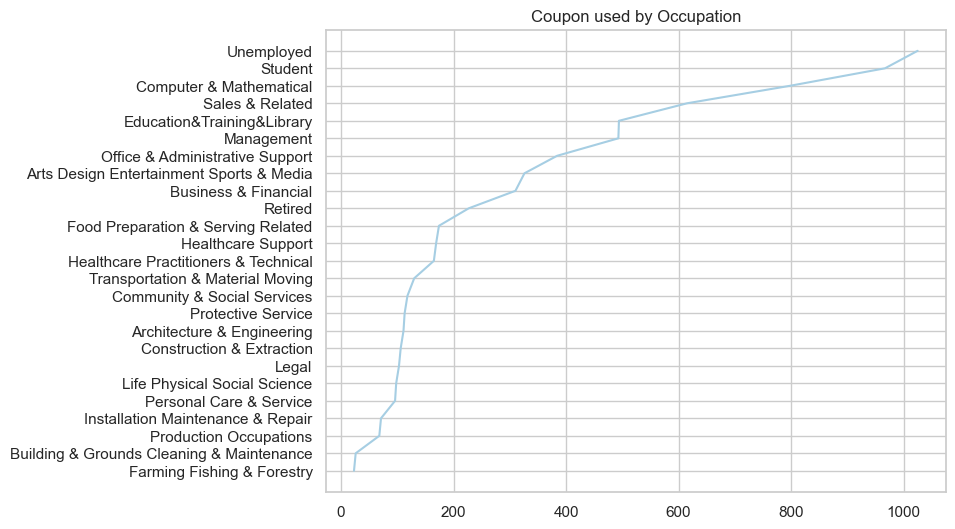

In [52]:
##Acceptance rate between driver who go to bars more than once a month and had passengers that had occupations other than farming, fishing, or forestry. 


plt.figure(figsize=(8,6))
sns.lineplot(y=target_yes['occupation'].value_counts().to_dict().keys(),x=target_yes['occupation'].value_counts().to_dict().values())

plt.title('Coupon used by Occupation')

Text(0.5, 1.0, 'Education Values Count')

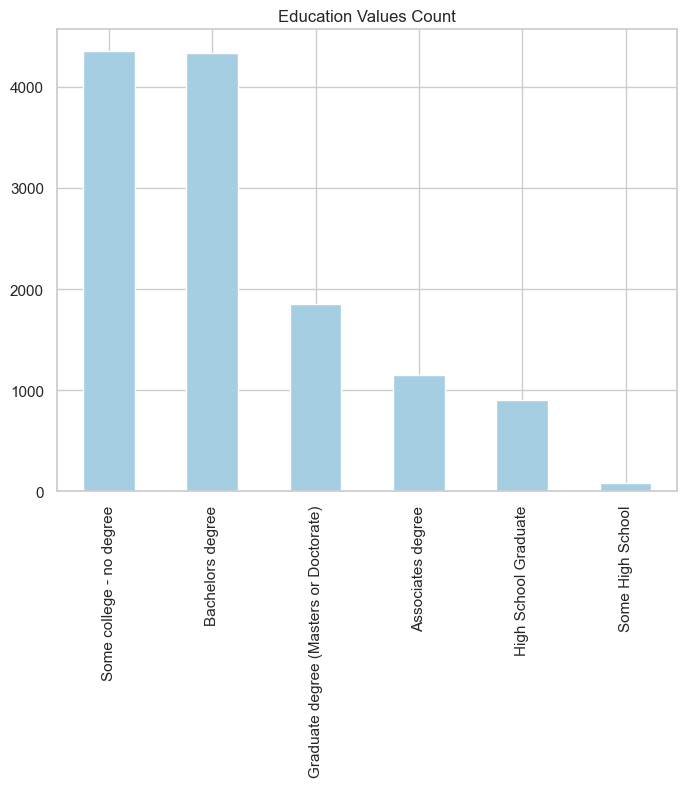

In [53]:
plt.figure(figsize=(8,6))

vehicle_df.education.value_counts().plot(kind='bar')
plt.title('Education Values Count')

Text(0.5, 1.0, 'Coupon used by Education')

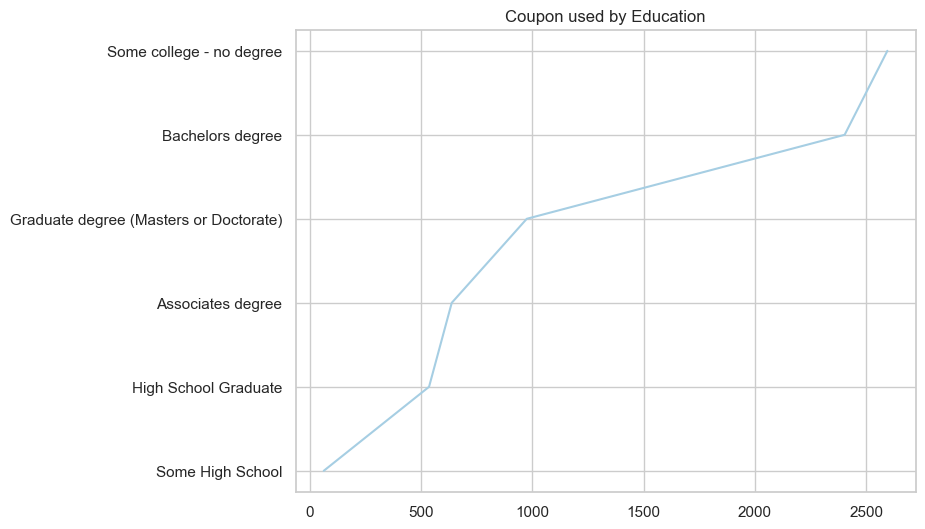

In [54]:
plt.figure(figsize=(8,6))
sns.lineplot(y=target_yes['education'].value_counts().to_dict().keys(),x=target_yes['education'].value_counts().to_dict().values())

plt.title('Coupon used by Education')

Text(0.5, 1.0, 'Age Values Count')

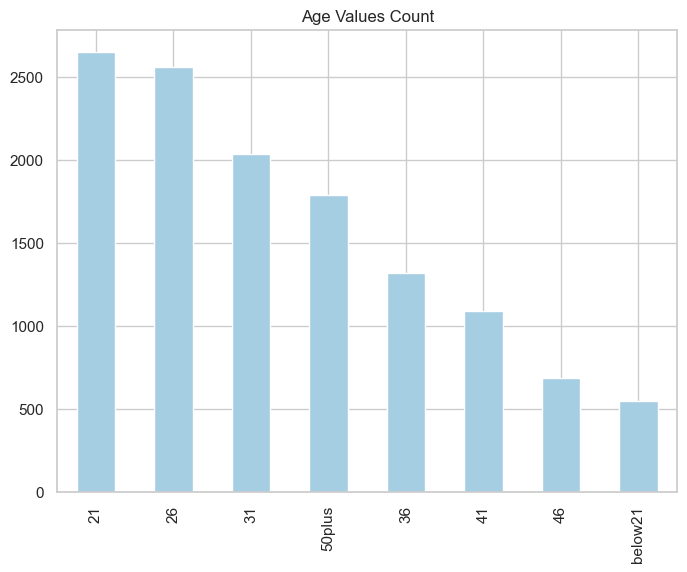

In [55]:
plt.figure(figsize=(8,6))

vehicle_df.age.value_counts().plot(kind='bar')
plt.title('Age Values Count')

Text(0.5, 1.0, 'Coupon used by Age')

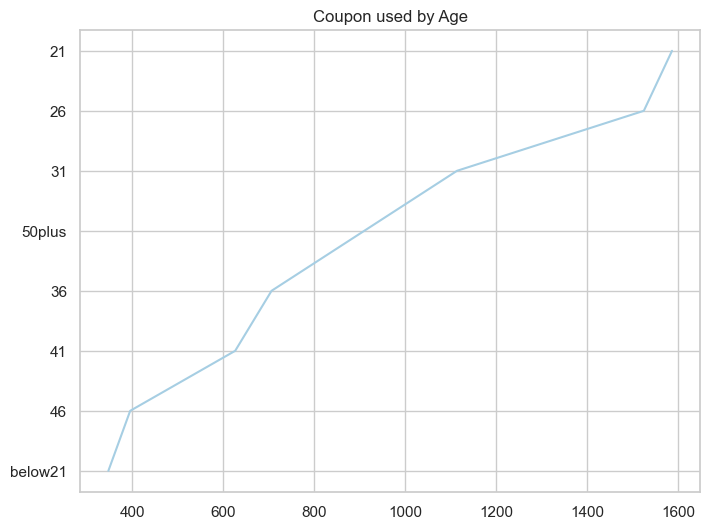

In [56]:
plt.figure(figsize=(8,6))
sns.lineplot(y=target_yes['age'].value_counts().to_dict().keys(),x=target_yes['age'].value_counts().to_dict().values())

plt.title('Coupon used by Age')
     

Text(0.5, 1.0, 'Gender Value Counts')

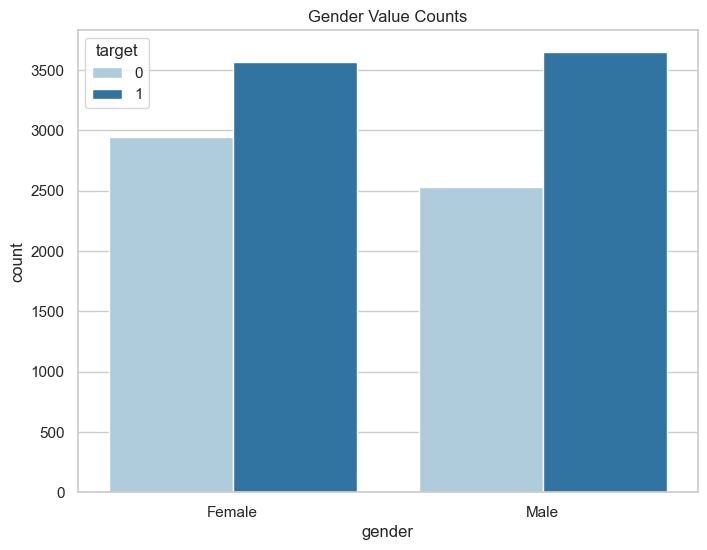

In [57]:
plt.figure(figsize = (8,6))

sns.countplot(x='gender',data=vehicle_df,hue='target')
plt.title("Gender Value Counts")
     

Text(0.5, 1.0, 'Marital Status Value Counts')

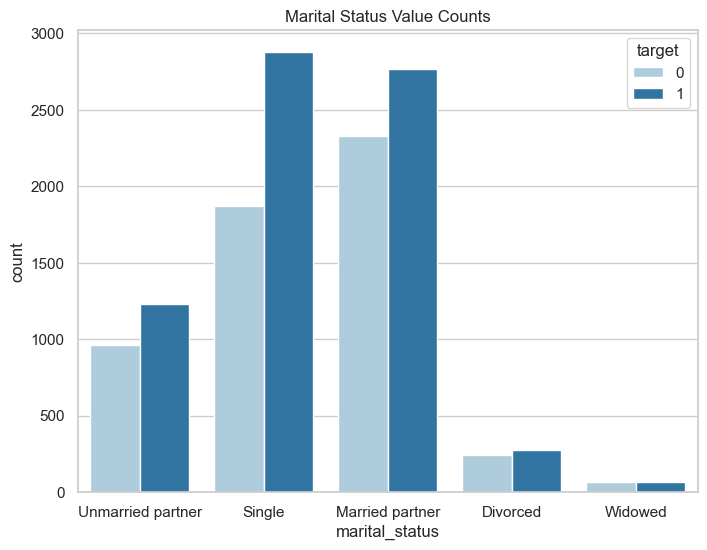

In [58]:
plt.figure(figsize = (8,6))

sns.countplot(x='marital_status',data=vehicle_df,hue='target')
plt.title("Marital Status Value Counts")

In [59]:
import os
print (os.getcwd())

/Users/priti16
